In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import os, json


with open('summary/l2-errors.0.json') as f:
    dicts = json.load(f)
df = pd.DataFrame(dicts)

In [2]:
measures = {'l2.adele.dense', 'l2.adele.sparse', 'l2.mrlasso.dense.4', 'l2.mrlasso.sparse.4'}
agg_dict = dict()
for key in measures:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['m', 'n', 'noise'], as_index=False).agg(agg_dict)

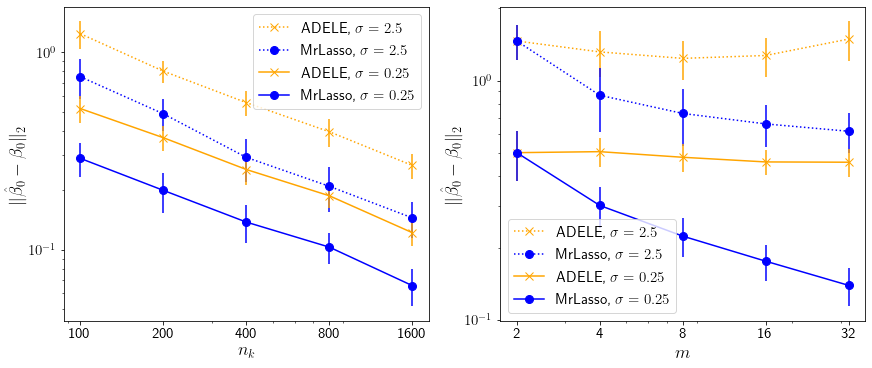

In [3]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

fontsize = 15
labelsize = 18
markersize = 8

fig, ax = plt.subplots(1, 2, figsize = (12, 5), constrained_layout = True)




sigmas = [2.5, 0.25]
ltys = [':', '-']


pars = {'m': 5}
result1 = result
for key in pars.keys():
    result1 = result1.loc[result1[key] == pars[key]]

types = ['sparse']
mks = ['x']

estimators = ['adele', 'mrlasso']
cols = ['orange', 'blue']
mks = ['x', 'o']


index = 0
for sigma, lty in zip(sigmas, ltys):
    for est, col, mk in zip(estimators, cols, mks):
        typ = 'sparse'
        result2 = result1.loc[result1['noise'] == sigma]
        msr = 'l2.' + est + '.' + typ
        if est == 'mrlasso':
            msr = msr + '.4'
        mean, std = result2[msr]['mean'], result2[msr]['std']
        x = result2['n']
        ax[index].errorbar(x, mean, std, linestyle = lty, color = col, marker = mk, markersize = markersize)
ax[index].set_xscale('log')
ax[index].set_yscale('log')
ax[index].set_xlabel('$n_k$', fontsize = labelsize)
ax[index].set_ylabel(r'$\|\hat\beta_0-\beta_0\|_2$', labelpad = 0, fontsize = labelsize)
ax[index].set_xticklabels(x, fontsize = fontsize)
ax[index].set_xticks(x)
ax[index].tick_params(axis = 'y', labelsize = fontsize)




result1 = result.loc[result['m'] != 5]

types = ['sparse']
mks = ['x']

estimators = ['adele', 'mrlasso']
cols = ['orange', 'blue']
mks = ['x', 'o']

index = 1
for sigma, lty in zip(sigmas, ltys):
    for est, col, mk in zip(estimators, cols, mks):
        typ = 'sparse'
        result2 = result1.loc[result1['noise'] == sigma]
        msr = 'l2.' + est + '.' + typ
        if est == 'mrlasso':
            msr = msr + '.4'
        mean, std = result2[msr]['mean'], result2[msr]['std']
        x = result2['m']
        ax[index].errorbar(x, mean, std, linestyle = lty, color = col, marker = mk, markersize = markersize)
ax[index].set_xscale('log')
ax[index].set_yscale('log')
ax[index].set_xlabel('$m$', fontsize = labelsize)
ax[index].set_ylabel(r'$\|\hat\beta_0-\beta_0\|_2$', labelpad = 0, fontsize = labelsize)
ax[index].set_xticks(x)
ax[index].set_xticklabels(x, fontsize = fontsize)
ax[index].tick_params(axis = 'y', labelsize = fontsize)



estimators = ['ADELE', 'MrLasso']
cols = ['orange', 'blue']
mks = ['x', 'o']

labels = []
lines = []

for sigma, lty in zip(sigmas, ltys):
    for est, col, mk in zip(estimators, cols, mks):
        if sigma == 0.25:
            labels.append(est+', '+r'$\sigma = {:.2f}$'.format(sigma))
        else:
            labels.append(est+', '+r'$\sigma = {:.1f}$'.format(sigma))
        lines.append(Line2D([0], [0], linestyle = lty, color = col, marker = mk, markersize = markersize))

ax[0].legend(lines, labels, fontsize = fontsize)
ax[1].legend(lines, labels, fontsize = fontsize)
plt.savefig('sim.pdf')